In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
test_data.head()

,Unnamed: 0,Smiles
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...


In [5]:
test_data.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
test_data.columns

Index(['Smiles'], dtype='object')

In [7]:
data.head()

,Unnamed: 0,Smiles,Active
0,0,COc1ccc2[nH]cc(CCN)c2c1,False
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False


In [8]:
data.columns

Index(['Unnamed: 0', 'Smiles', 'Active'], dtype='object')

In [9]:
data.drop(columns=["Unnamed: 0"], axis=0, inplace=True)

In [10]:
data.head()

,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,False
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False


In [11]:
data.Active.value_counts()

False    5351
True      206
Name: Active, dtype: int64

we can see, our dataset is highly imbalanced. in this case, we can not rely upon `accuracy` classification matrix. we will validate our models later on `f1-score`.

In [12]:
data['Smiles'].isnull().sum(), data['Active'].isnull().sum()

(0, 0)

we can see above that there are no `NULL` values in `SMILES` column as well as in the label column.

In [13]:
!pip install rdkit-pypi -qqq

     |████████████████████████████████| 20.6 MB 1.4 MB/s 


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.rdMolDescriptors import CalcNumAromaticRings
from rdkit.Chem.rdMolDescriptors import CalcNumAromaticHeterocycles, CalcNumAtomStereoCenters, CalcNumAtoms, CalcNumHBA, CalcNumHBD

plotting a sample train data

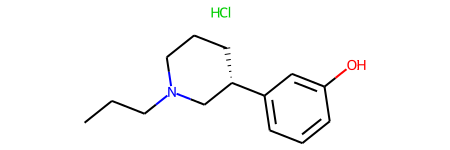

In [15]:
mol = Chem.MolFromSmiles(data['Smiles'][1])
mol

plotting a sample test data

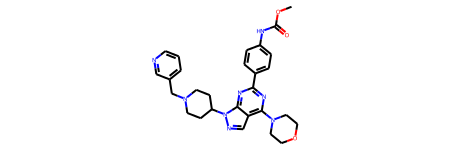

In [16]:
mol = Chem.MolFromSmiles(test_data['Smiles'][0])
mol

In [17]:
# let's find out the molecular weight of the compound
MolWt(mol)

528.6170000000003

In [18]:
# let's encode the labels
for i in range(len(data['Active'])):
  if data['Active'][i] == False:
    data['Active'][i] = 0
  else:
    data['Active'][i] = 1
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,0
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0
...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0
5554,Oc1cccc2cccnc12,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0


In [19]:
# adding columns in train data
data["molecular_weight"] = data['Active']* 0
data["aromatic_rings"] = data['Active']* 0
data["aromatic_hetro_cycles"] = data['Active']* 0
data["no_atom_stereo_center"] = data['Active']* 0
data["molecular_weight"] = data['Active']* 0
data['no_atoms'] = data['Active']*0

# adding columns in test data 

test_data["molecular_weight"] = ""
test_data["aromatic_rings"] = ""
test_data["aromatic_hetro_cycles"] = ""
test_data["no_atom_stereo_center"] = ""
test_data["molecular_weight"] = ""
test_data['no_atoms'] = ""

In [20]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data["Smiles"][i])
  mol = MolWt(mol)
  data["molecular_weight"][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,0,0,0,0
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,0,0,0,0
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,0,0,0,0
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,0,0,0,0
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,0,0,0,0
...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,0,0,0,0
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,0,0,0,0
5554,Oc1cccc2cccnc12,0,145.161,0,0,0,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,0,0,0,0


In [21]:
for i in range(len(test_data)):
  mol = Chem.MolFromSmiles(data["Smiles"][i])
  mol = MolWt(mol)
  test_data["molecular_weight"][i] = mol
test_data

,Smiles,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,190.246,,,,
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,255.789,,,,
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,413.459,,,,
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,443.478,,,,
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,331.394,,,,
...,...,...,...,...,...,...
1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,291.088,,,,
1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,345.855,,,,
1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,266.388,,,,
1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,337.463,,,,


In [22]:
data['Active'].unique()

array([0, 1], dtype=object)

we have added the molecular weight column into our original dataframe.

now we will go for some more features!!
total number of valence electrons, and total number of chemical rings. 

In [23]:
mol = Chem.MolFromSmiles(data['Smiles'][500])
mol = CalcNumAromaticRings(mol)
mol

3

In [24]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  aromatic_rings = CalcNumAromaticRings(mol)
  test_data['aromatic_rings'][i] = aromatic_rings
  aromatic_hetro_cycle = CalcNumAromaticHeterocycles(mol)
  test_data['aromatic_hetro_cycles'][i] = aromatic_hetro_cycle
  number_atom_stereo_center = CalcNumAtomStereoCenters(mol)
  test_data['no_atom_stereo_center'][i] = number_atom_stereo_center
  no_of_atoms = CalcNumAtoms(mol)
  test_data['no_atoms'][i] = no_of_atoms
test_data

,Smiles,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,190.246,2,1,0,28
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,255.789,1,0,1,39
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,413.459,3,1,0,48
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,443.478,4,1,0,55
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,331.394,4,2,0,43
...,...,...,...,...,...,...
1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,291.088,1,0,1,23
1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,345.855,3,2,0,39
1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,266.388,2,0,0,42
1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,337.463,2,0,3,52


In [25]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumAromaticRings(mol)
  data['aromatic_rings'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,0,0,0
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,0
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,0,0,0
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,0,0,0
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,0,0,0
...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,0
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,0,0,0
5554,Oc1cccc2cccnc12,0,145.161,2,0,0,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,0,0,0


In [26]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumAromaticHeterocycles(mol)
  data['aromatic_hetro_cycles'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,0,0
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,0
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,0,0
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,0,0
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,0,0
...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,0
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,0,0
5554,Oc1cccc2cccnc12,0,145.161,2,1,0,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,0,0


In [27]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumAromaticHeterocycles(mol)
  data['no_atom_stereo_center'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,0
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,0
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,0
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,0
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,0
...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,0
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,0
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,0


In [28]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumAtoms(mol)
  data['no_atoms'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,28
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,39
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,48
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,55
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,43
...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,62
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,25
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,18
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,61


In [29]:
data['no_HBA'] = data['Active'] * 0
data['no_HBD'] = data['Active'] * 0

In [30]:
test_data['no_HBA'] = ""
test_data['no_HBD'] = ""

In [31]:
for i in range(len(test_data)):
  mol = Chem.MolFromSmiles(test_data['Smiles'][i])
  number_HBA = CalcNumHBA(mol)
  number_HBD = CalcNumHBD(mol)
  test_data['no_HBA'][i] = number_HBA
  test_data['no_HBD'][i] = number_HBD
test_data

,Smiles,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,190.246,2,1,0,28,10,1
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,255.789,1,0,1,39,2,0
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,413.459,3,1,0,48,7,7
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,443.478,4,1,0,55,7,3
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,331.394,4,2,0,43,9,2
...,...,...,...,...,...,...,...,...
1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,291.088,1,0,1,23,5,3
1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,345.855,3,2,0,39,5,3
1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,266.388,2,0,0,42,6,2
1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,337.463,2,0,3,52,6,2


In [32]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumHBA(mol)
  data['no_HBA'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,28,2,0
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,39,2,0
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,48,7,0
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,55,5,0
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,43,2,0
...,...,...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,62,9,0
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,25,6,0
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,18,2,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,61,4,0


In [33]:
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumHBD(mol)
  data['no_HBD'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,28,2,2
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,39,2,1
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,48,7,2
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,55,5,2
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,43,2,2
...,...,...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,62,9,1
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,25,6,3
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,18,2,1
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,61,4,1


In [34]:
data['no_rings'] = data['Active'] * 0

In [35]:
# taking out information regarding number of rings in the molecule
from rdkit.Chem.rdMolDescriptors import CalcNumRings
for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumRings(mol)
  data['no_rings'][i]  = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD,no_rings
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,28,2,2,2
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,39,2,1,2
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,48,7,2,4
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,55,5,2,4
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,43,2,2,4
...,...,...,...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,62,9,1,6
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,25,6,3,2
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,18,2,1,2
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,61,4,1,4


In [36]:
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
data['rotatable_bonds'] = data['Active'] * 0

for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcNumRotatableBonds(mol)
  data['rotatable_bonds'][i] = mol
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD,no_rings,rotatable_bonds
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,28,2,2,2,3
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,39,2,1,2,3
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,48,7,2,4,4
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,55,5,2,4,8
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,43,2,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,62,9,1,6,5
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,25,6,3,2,2
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,18,2,1,2,0
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,61,4,1,4,6


In [37]:
from rdkit.Chem.rdMolDescriptors import CalcChi3n
mol = Chem.MolFromSmiles(data['Smiles'][10])
mol = CalcChi3n(mol)


In [38]:
data['cal_chi3n'] = ""
test_data['cal_chi3n'] = ""

for i in range(len(data)):
  mol = Chem.MolFromSmiles(data['Smiles'][i])
  mol = CalcChi3n(mol)
  data['cal_chi3n'][i] = mol

for i in range(len(test_data)):
  mol = Chem.MolFromSmiles(test_data['Smiles'][i])
  mol = CalcChi3n(mol)
  test_data['cal_chi3n'][i] = mol

In [39]:
data

,Smiles,Active,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD,no_rings,rotatable_bonds,cal_chi3n
0,COc1ccc2[nH]cc(CCN)c2c1,0,190.246,2,1,1,28,2,2,2,3,2.388265
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,0,255.789,1,0,0,39,2,1,2,3,3.386963
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,0,413.459,3,1,1,48,7,2,4,4,4.882131
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,0,443.478,4,1,1,55,5,2,4,8,4.743324
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,0,331.394,4,2,2,43,2,2,4,5,4.327533
...,...,...,...,...,...,...,...,...,...,...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,0,520.494,3,0,0,62,9,1,6,5,7.222025
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,0,316.09,2,1,1,25,6,3,2,2,2.020549
5554,Oc1cccc2cccnc12,0,145.161,2,1,1,18,2,1,2,0,1.611419
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,0,527.484,3,1,1,61,4,1,4,6,6.498923


In [40]:
test_data

,Smiles,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD,cal_chi3n
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,190.246,2,1,0,28,10,1,7.351116
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,255.789,1,0,1,39,2,0,3.212548
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,413.459,3,1,0,48,7,7,2.237368
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,443.478,4,1,0,55,7,3,2.628464
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,331.394,4,2,0,43,9,2,5.810493
...,...,...,...,...,...,...,...,...,...
1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,291.088,1,0,1,23,5,3,4.981656
1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,345.855,3,2,0,39,5,3,3.017943
1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,266.388,2,0,0,42,6,2,9.352597
1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,337.463,2,0,3,52,6,2,3.300164


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Smiles                 5557 non-null   object
 1   Active                 5557 non-null   object
 2   molecular_weight       5557 non-null   object
 3   aromatic_rings         5557 non-null   object
 4   aromatic_hetro_cycles  5557 non-null   object
 5   no_atom_stereo_center  5557 non-null   object
 6   no_atoms               5557 non-null   object
 7   no_HBA                 5557 non-null   object
 8   no_HBD                 5557 non-null   object
 9   no_rings               5557 non-null   object
 10  rotatable_bonds        5557 non-null   object
 11  cal_chi3n              5557 non-null   object
dtypes: object(12)
memory usage: 521.1+ KB


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Smiles                 1614 non-null   object
 1   molecular_weight       1614 non-null   object
 2   aromatic_rings         1614 non-null   object
 3   aromatic_hetro_cycles  1614 non-null   object
 4   no_atom_stereo_center  1614 non-null   object
 5   no_atoms               1614 non-null   object
 6   no_HBA                 1614 non-null   object
 7   no_HBD                 1614 non-null   object
 8   cal_chi3n              1614 non-null   object
dtypes: object(9)
memory usage: 113.6+ KB


In [43]:
# we are short of two columns in our test dataset, let's see which Descriptors we have missed to add.

not_in = []
for i in data.columns:
  if i not in test_data.columns:
    not_in.append(i)
not_in

['Active', 'no_rings', 'rotatable_bonds']

In [44]:
test_data['no_rings'] = ""
test_data['rotatable_bonds'] = ""
for i in range(len(test_data)):
  mol = Chem.MolFromSmiles(test_data['Smiles'][i])
  number_rings = CalcNumRings(mol)
  rotatable_bond = CalcNumRotatableBonds(mol)
  test_data['no_rings'][i] = number_rings
  test_data['rotatable_bonds'][i] = rotatable_bond
test_data

,Smiles,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD,cal_chi3n,no_rings,rotatable_bonds
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,190.246,2,1,0,28,10,1,7.351116,6,6
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,255.789,1,0,1,39,2,0,3.212548,3,3
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,413.459,3,1,0,48,7,7,2.237368,1,5
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,443.478,4,1,0,55,7,3,2.628464,2,2
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,331.394,4,2,0,43,9,2,5.810493,6,4
...,...,...,...,...,...,...,...,...,...,...,...
1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,291.088,1,0,1,23,5,3,4.981656,4,2
1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,345.855,3,2,0,39,5,3,3.017943,2,5
1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,266.388,2,0,0,42,6,2,9.352597,4,5
1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,337.463,2,0,3,52,6,2,3.300164,3,5


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Smiles                 1614 non-null   object
 1   molecular_weight       1614 non-null   object
 2   aromatic_rings         1614 non-null   object
 3   aromatic_hetro_cycles  1614 non-null   object
 4   no_atom_stereo_center  1614 non-null   object
 5   no_atoms               1614 non-null   object
 6   no_HBA                 1614 non-null   object
 7   no_HBD                 1614 non-null   object
 8   cal_chi3n              1614 non-null   object
 9   no_rings               1614 non-null   object
 10  rotatable_bonds        1614 non-null   object
dtypes: object(11)
memory usage: 138.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


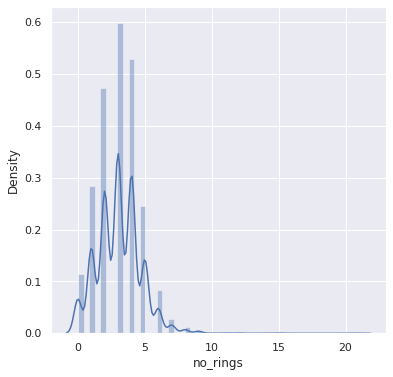

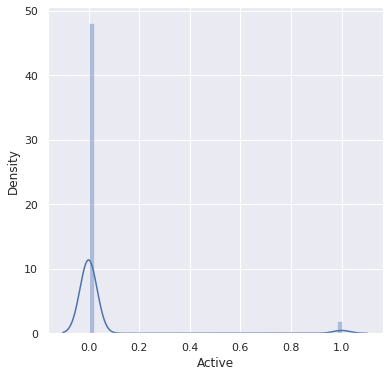

In [46]:
import seaborn as sns
sns.set(color_codes=True)
plot = sns.distplot(data.no_rings)
plot.figure.set_size_inches(6,6)
plt.figure()
plot = sns.distplot(data.Active)
plot.figure.set_size_inches(6,6)

### FEATURE SCALING

we will use `Standardization` for feature scaling. we could also have used `Normalization`

we will drop the `Smiles` column after we have taken out all the meaningful information for our purpose.

In [47]:
data.drop(columns=['Smiles'], inplace=True)
test_data.drop(columns=['Smiles'], inplace=True)

In [48]:
data_x = data.drop(columns=["Active"])
data_y = data['Active']

In [49]:
data_x.head(3)

,molecular_weight,aromatic_rings,aromatic_hetro_cycles,no_atom_stereo_center,no_atoms,no_HBA,no_HBD,no_rings,rotatable_bonds,cal_chi3n
0,190.246,2,1,1,28,2,2,2,3,2.388265
1,255.789,1,0,0,39,2,1,2,3,3.386963
2,413.459,3,1,1,48,7,2,4,4,4.882131


In [50]:
feature_train = data_x.columns
feature_test = test_data.columns
feature_train, feature_test
# len(feature_train), len(feature_test)
type(feature_train)

pandas.core.indexes.base.Index

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_x = sc.fit_transform(data[feature_train])
test_data = sc.fit_transform(test_data[feature_test])

type(data_x), type(test_data)

(numpy.ndarray, numpy.ndarray)

In [52]:
len(data_x[0])

10

### SPLITTING OUR TRAIN DATA FOR MODEL TRAINING AND VALIDATION PURPOSE

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [54]:
x_train

array([[ 0.22805843, -0.01173019, -0.84487651, ..., -0.64772719,
         2.50727721,  0.22069754],
       [ 2.64886713,  1.50419241,  3.59272155, ...,  1.80461141,
         2.04742905,  1.03891093],
       [ 0.68268382,  2.26215372,  3.59272155, ...,  2.41769606,
        -0.02188768,  1.10178753],
       ...,
       [-0.91891444,  0.74623111,  1.37392252, ..., -0.03464254,
        -0.941584  , -0.7991868 ],
       [-0.17882004,  1.50419241,  0.26452301, ...,  0.57844211,
        -0.25181176, -0.04041083],
       [ 0.33246309, -0.01173019,  0.26452301, ..., -0.64772719,
        -1.17150809, -1.12431761]])

In [55]:
x_train.shape, y_train.shape, x_val.shape, y_train.shape

((4445, 10), (4445,), (1112, 10), (4445,))

In [56]:
len(x_train), len(y_train), len(x_val), len(y_val)

(4445, 4445, 1112, 1112)

```
for now, we have sufficient features to train a basic machine learning/ deep learing model. let's start with our base model.
```

# MODEL 1: Random Forest CLassifier

as our label type is `object`, we will first need to convert it into `int` so that our model does not throw error while training.

In [57]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')

In [58]:
from sklearn.ensemble import RandomForestClassifier
rvc = RandomForestClassifier()
rvc.fit(x_train, y_train)

RandomForestClassifier()

now let's validate our model on validation data.

In [59]:
y_pred = rvc.predict(x_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
count = 0
for i in range(len(y_pred)):
  if y_pred[i]==1:
    count = count+1
count

2

we will use `f1-score` classificatio matrix for the purpose of our validation as required by `Global AI Challenge` jury.

In [61]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)

f1, acc

(0.0, 0.9577338129496403)

we can see here, that our `accuracy` is high and at the same time `f1_score` is zero, that is because of the imbalanced data set that we have. we need to apply some techniques to deal with our imbalanced dataset.

let's plot the confusion matrix for our model

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1065,    2],
       [  45,    0]])

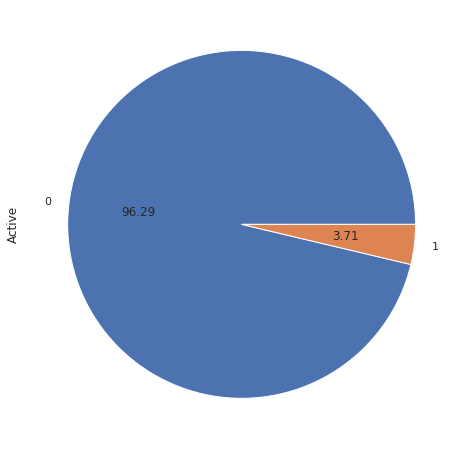

In [63]:
plt.figure(figsize=(10,8))
data_y.value_counts().plot.pie(autopct="%.2f")

we can see that, one of our class consists of 96.29 percent of all the classes. This clearly shows we have imbalanced datset.

**we will perform Undersampling as well as oversampling and then used oversampled as well as undersampled dataset to see the results and will choose the best resulting process at last.**

## RANDOM UNDERSAMPLING

In [64]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 22.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [65]:
from imblearn.under_sampling import RandomUnderSampler

In [66]:
ruc = RandomUnderSampler(sampling_strategy=1)
""" 
this will provide us with the classes in equal ratio. 
we can change the value of sampling_strategy to change class number ratio.
"""
x_res, y_res = ruc.fit_resample(x_train, y_train)

In [67]:
y_res.value_counts()

0    161
1    161
Name: Active, dtype: int64

Text(0.5, 1.0, 'Under Sampling')

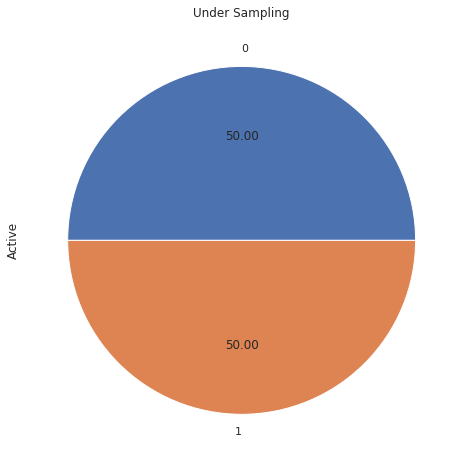

In [68]:
plt.figure(figsize=(10,8))
y_res.value_counts().plot.pie(autopct="%.2f").set_title("Under Sampling")

now let's train our model with Under Sampled data.

# Model 2: Undersampled data with Random Forest Classifier

In [69]:
rvc.fit(x_res,y_res)

RandomForestClassifier()

In [70]:
y_pred = rvc.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.10666666666666667

clearly the undersampling did not do much as the amount of data reduced to little and it would be very difficult for the model to take out any pattern from this insanely small amount of data. 

so now we will use over sampling and hopefully can get better results.

## RANDOM OVERSAMPLING

In [71]:
from imblearn.over_sampling import SMOTE
ruc = SMOTE(sampling_strategy=1)
""" 
this will provide us with the classes in equal ratio. 
we can change the value of sampling_strategy to change class number ratio.
"""
x_over, y_over = ruc.fit_resample(x_train, y_train)

In [72]:
y_over.value_counts()

0    4284
1    4284
Name: Active, dtype: int64

In [73]:
len(x_over), len(y_over)

(8568, 8568)

Text(0.5, 1.0, 'Under Sampling')

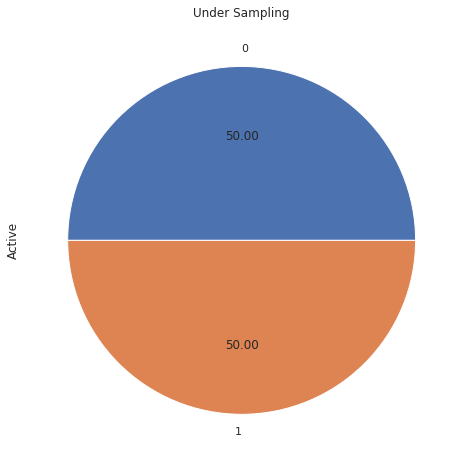

In [74]:
plt.figure(figsize=(10,8))
y_over.value_counts().plot.pie(autopct="%.2f").set_title("Under Sampling")

In [75]:
!pip install xgboost

# Model 3: OverSampled data with XGBoost Classifier

In [76]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(x_over, y_over)

XGBClassifier()

In [77]:
y_pred = XGB.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.14492753623188406

we still didn't get the required result. we will see ahead what we can do with our dataset to make it better for machine learning models.

# Model 3: Using RUSBoostClassifier

In [78]:
from imblearn.ensemble import RUSBoostClassifier
classifier = RUSBoostClassifier(random_state=42)
classifier.fit(x_over,y_over)

RUSBoostClassifier(random_state=42)

In [79]:
y_pred = classifier.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.14102564102564102

## let's make prediction over our original Test dataset

In [80]:
type(test_data)

numpy.ndarray

In [81]:
test_data

array([[-1.12188277,  0.        ,  0.24925904, ...,  0.89106625,
         1.75319944,  0.12850086],
       [-0.70785891, -0.77088018, -0.86207824, ..., -0.50548646,
        -0.04836925, -0.36926008],
       [ 0.28811539,  0.77088018,  0.24925904, ..., -0.83455964,
        -1.24941505, -0.03741945],
       ...,
       [-0.64090685,  0.        , -0.86207824, ...,  1.56646259,
         0.55215364, -0.03741945],
       [-0.19193829,  0.        , -0.86207824, ..., -0.47592082,
        -0.04836925, -0.03741945],
       [-0.38190426,  0.        , -0.86207824, ..., -0.20477748,
         0.55215364, -0.5351804 ]])

In [83]:
y_pred = classifier.predict(test_data)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
test_data

array([[-1.12188277,  0.        ,  0.24925904, ...,  0.89106625,
         1.75319944,  0.12850086],
       [-0.70785891, -0.77088018, -0.86207824, ..., -0.50548646,
        -0.04836925, -0.36926008],
       [ 0.28811539,  0.77088018,  0.24925904, ..., -0.83455964,
        -1.24941505, -0.03741945],
       ...,
       [-0.64090685,  0.        , -0.86207824, ...,  1.56646259,
         0.55215364, -0.03741945],
       [-0.19193829,  0.        , -0.86207824, ..., -0.47592082,
        -0.04836925, -0.03741945],
       [-0.38190426,  0.        , -0.86207824, ..., -0.20477748,
         0.55215364, -0.5351804 ]])

let's read the submission file now and add the predicted list as a column inside the csv file.

In [85]:
sub = pd.read_csv("submission.csv")
sub.head()

,Unnamed: 0,Smiles
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...


In [87]:
sub['Active'] = y_pred

In [88]:
sub.head()

,Unnamed: 0,Smiles,Active
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,1
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,1
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,1
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,1
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,1


In [89]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1614 non-null   int64 
 1   Smiles      1614 non-null   object
 2   Active      1614 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 38.0+ KB


In [91]:
sub.drop(columns=["Unnamed: 0"], inplace=True)
sub.head()

,Smiles,Active
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,1
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,1
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,1
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,1
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,1


In [92]:
# sub.to_csv("final_submission.csv")

and we have our `final submission file`. ready to upload on Hackathon web portal.